In [1]:
#Imports many of the packages which we use and loads in the test and training data
import pandas as pd
from sklearn import linear_model
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
train = pd.read_csv("train_Madison.csv")
test = pd.read_csv("test_Madison.csv")
#Saves array of restaurant names to a variable
names = train["name"]
#Saves array of stars to a variable
stars = train["star"] 
print("Minimum rating: ", min(stars))
print("Maximum rating: ", max(stars))

Minimum rating:  1
Maximum rating:  5


In [2]:
#This cell saves a bar graph of the number of times a certain number of stars was achieved
import matplotlib.pyplot as plt
unique, counts = np.unique(stars, return_counts=True)
starValues = [1, 2, 3, 4, 5]
plt.bar(starValues, counts, color='g')
plt.ylabel("Number of Reviews")
plt.title("Rating by Review")
plt.xlabel("Review Stars")
plt.savefig('reviewRatings.png')
plt.show()

<Figure size 640x480 with 1 Axes>

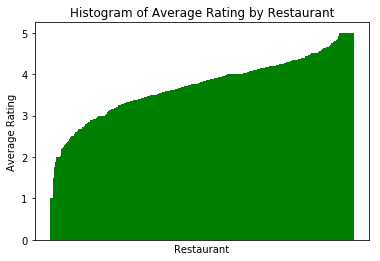

In [3]:
#Creates a dictionary of the average rating in the training set for each restaurant in the training set
ratingTotal = {}
ratingCount = {}
for i in range(0, len(names)):
    name = names[i]
    star = stars[i]
    if name not in ratingTotal:
        ratingTotal[name] = 0
        ratingCount[name] = 0
    ratingTotal[name] += star
    ratingCount[name]+=1
ratingAverage = dict((k, float(ratingTotal[k])/ratingCount[k]) for k in ratingCount)
sortedAverages = sorted(list(ratingAverage.values()))
plt.bar(list(ratingAverage.keys()), sortedAverages, 3, color='g')
plt.ylabel("Average Rating")
plt.title("Histogram of Average Rating by Restaurant")
plt.xticks([])
plt.xlabel("Restaurant")
plt.savefig('averageRating.png')
plt.show()

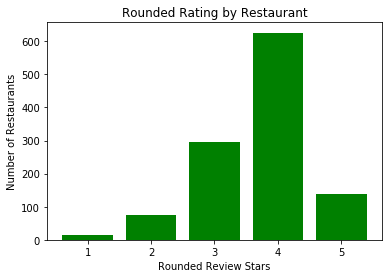

In [4]:
#This cell creates a bar graph of the average ratings for each restaurant by rounding the average rating to a discrete value 1 through 5
sortedAverages = sorted(list(ratingAverage.values()))
discreteAverage = []
for average in sortedAverages:
    discreteAverage.append(round(average))

unique, counts = np.unique(discreteAverage, return_counts=True)
plt.bar(starValues, counts, color='g')
plt.ylabel("Number of Restaurants")
plt.title("Rounded Rating by Restaurant")
plt.xlabel("Rounded Review Stars")
plt.savefig('averageRatingDiscrete.png')
plt.show()

In [5]:
import numpy as np
from sklearn.metrics import r2_score
positiveCount = []
negativeCount = []
positiveOverall = []
ratingArray = []
nwords = []
posnshort = []
negnlong = []
nchars = []
avgChars = []
cityscore =[]
numReviews = []
posnegratio = []

   
#Creates a subjective list of words that we view as 'positive' or 'negative'

positiveWords = ["knowledgeable", "gem", "highly", "incredible", "amazing", "die", "favorites", "wonderful", "perfect", "fantastic", "notch",
                 "favorite", "awesome", "outstanding", "yum", "delicious", "excellent", "perfectly", "loved", "helpful", "best", 
                 "savory", "cozy", "unique", "yummy", "glad", "homemade", "best", "love", "lovely", "always", "friendly", "fan",  
                 "reasonable", "beautiful", "recommended", "fashioned", "classic", "traditional", "great", "fresh", "definitely",
                 "healthy", "generous", "comfortable", "rich", "recommend", "local", "authentic", "flavorful", "highly",
                 "enjoyed", "pleased", "flavors", "super", "happy", "absolutely", "tasty", "enjoy", "fun", "reasonably", "plenty",
                 "attentive", "truly", "fancy", "wow", "must", "nicely", "every", "quick", "easily", "craving", "well"]
negativeWords = ["disappointing", "weird", "issue", "none", "last", "problem", "dirty", "mediocre", "ok", "poor", "terrible",
                 "awful", "rude", "horrible", "worst", "overpriced", "needed", "barely", "sorry", "waited", "soggy", "waiting",
                 "bland", "forgot", "hope","unfortunately", "sad", "away", "bad", "loud", "overly", "greasy", "frozen", "dry",
                 "empty", "never", "less", "hard", "expensive", "tiny", "however", "wrong", "longer", "nothing", "average", 
                 "cold", "slow", "lack", "avoid", "forget", "left", "worst", "paid", "money", "minutes", "phone","asking",
                 "manager", "paying", "finally", "called", "charge", "customer", "clearly", "bill", "asked","told"]
for word in positiveWords:
    correlation = np.corrcoef(train[word],train["star"])
    if correlation[0][1]<0:
        print(word)
for word in negativeWords:
    correlation = np.corrcoef(train[word],train["star"])
    if correlation[0][1]>0:
        print(word)
        
#Counts up the number of positive and negative words in each array as well as the total number of words and characters
for i in range(0, len(names)):
    posC = 0
    negC = 0
    for word in positiveWords:
        wordCount = train[word][i]
        posC+=wordCount
    for negWord in negativeWords:
        negWordCount = train[negWord][i]
        negC+=negWordCount
    nword = np.array(train["nword"])[i]
    nchar = np.array(train["nchar"])[i]
    avgChars.append(nchar/nword)
    nwords.append(nword)
    nchars.append(nchar)
    positiveCount.append(posC)
    negativeCount.append(negC)
    posnegratio.append((posC)/(negC + 1))
    #posnshort is the number of positive words divided by the total number of words
    posnshort.append(posC/nword)
    negnlong.append(negC*nword)
    if posC>negC:
        positiveOverall.append(1)
    elif posC<negC:
        positiveOverall.append(-1.5)
    else:
        positiveOverall.append(0)
    ratingArray.append(ratingAverage[names[i]])
    numReviews.append(ratingCount[names[i]])
print("Maximum Characters: ", max(nchars))    
#This outputs the average rating for restaurants with many reviews in the training set
smallRatingAverage = dict((k, float(ratingTotal[k])/ratingCount[k]) for k in ratingCount if ratingCount[k]<3)
smallTotal = 0
for k in smallRatingAverage:
     smallTotal+=float(smallRatingAverage[k])
print("Small Total: ", len(smallRatingAverage))
print("Small Average: ", smallTotal/len(smallRatingAverage))

#This outputs the average rating for restaurants with few ratings in the training set
largeRatingAverage = dict((k, float(ratingTotal[k])/ratingCount[k]) for k in ratingCount if ratingCount[k]>=50)
largeTotal = 0
for k in largeRatingAverage:
    largeTotal+=float(largeRatingAverage[k])
print("Large Total: ", len(largeRatingAverage))    
print("Large Average: ", largeTotal/len(largeRatingAverage))


gem
comfortable
wow
Maximum Characters:  5000
Small Total:  93
Small Average:  3.672043010752688
Large Total:  325
Large Average:  3.7394261707389096


Average rating for 'positive' review:  4.309441453364213
Average rating for 'negative' review:  2.3961275987938424


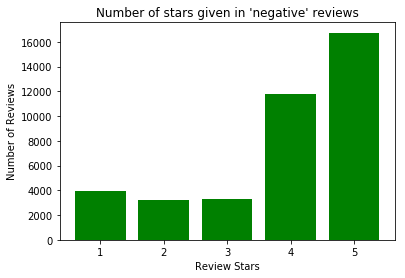

In [6]:
#Returns bar graphs of the stars given to reviews with a tone that is positive overall and negative overall
positiveStars = []
negativeStars = []
for i in range(0, len(positiveOverall)):
    if positiveOverall[i] == 1:
        positiveStars.append(stars[i])
    elif positiveOverall[i] == -1.5:
        negativeStars.append(stars[i])
unique, counts = np.unique(positiveStars, return_counts=True)
unique1, counts1 = np.unique(negativeStars, return_counts=True)
print("Average rating for 'positive' review: ", np.mean(positiveStars))
print("Average rating for 'negative' review: ", np.mean(negativeStars))
plt.bar(starValues, counts, color='g')
plt.ylabel("Number of Reviews")
plt.title("Number of stars given in 'positive' reviews")
plt.xlabel("Review Stars")
plt.savefig('positiveRatings.png')
plt.bar(starValues, counts1, color='g')
plt.ylabel("Number of Reviews")
plt.title("Number of stars given in 'negative' reviews")
plt.xlabel("Review Stars")
plt.savefig('negativeRatings.png')
plt.show()

Average rating for long review:  3.3690221270521055
Average rating for short review:  4.134757959005669
Number of long reviews:  7005
Number of short reviews:  2293


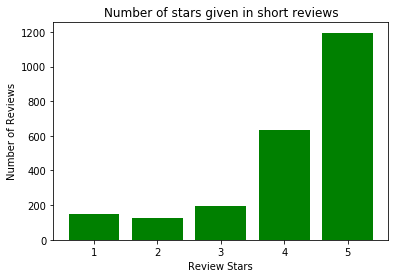

In [7]:
#Returns bar graphs of the stars given to reviews with a many words vs. few words
manyWordStars = []
fewWordStars = []
wordArray = train["nword"]
for i in range(0, len(wordArray)):
    if wordArray[i] > 200:
        manyWordStars.append(stars[i])
    elif wordArray[i] < 20:
        fewWordStars.append(stars[i])
unique, counts = np.unique(manyWordStars, return_counts=True)
unique1, counts1 = np.unique(fewWordStars, return_counts=True)
print("Average rating for long review: ", np.mean(manyWordStars))
print("Average rating for short review: ", np.mean(fewWordStars))
print("Number of long reviews: ", len(manyWordStars))
print("Number of short reviews: ", len(fewWordStars))
#plt.bar(starValues, counts, color='g')
#plt.ylabel("Number of Reviews")
#plt.title("Number of stars given in long reviews")
#plt.xlabel("Review Stars")
#plt.savefig('longRatings.png')
plt.bar(starValues, counts1, color='g')
plt.ylabel("Number of Reviews")
plt.title("Number of stars given in short reviews")
plt.xlabel("Review Stars")
plt.savefig('shortRatings.png')
plt.show()

Average rating for highly reviewed restaurants:  4.196556671449067
Average rating for lowly reviewed restaurants:  2.70941438102298
Unpopular Counts:  [798 483 521 497 399]
Popular Counts:  [ 402  477  933 2935 5011]


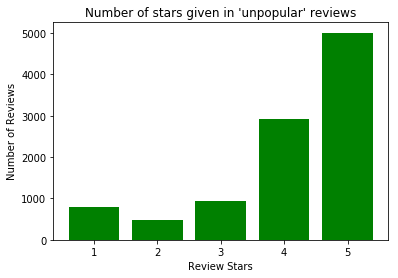

In [8]:
'''This cell tests the efficacy of using a restaurants average review in the training set to predict its review.
Of course, this feature would be highly correlated with average rating in the training set because it is so meta
so we decided to break the training set in half and form a feature on one set and test it on the other set
'''
firstHalf = stars[:round((len(stars)/2))]
FHratingTotal = {}
FHratingCount = {}
for i in range(0, len(stars), 2):
    name = names[i]
    star = stars[i]
    if name not in FHratingTotal:
        FHratingTotal[name] = 0
        FHratingCount[name] = 0
    FHratingTotal[name] += star
    FHratingCount[name]+=1
FHratingAverage = dict((k, float(FHratingTotal[k])/FHratingCount[k]) for k in FHratingCount)
#print(FHratingAverage)
highlyReviewed = []
lowlyReviewed = []
for i in range(1, len(stars), 2):
    name = names[i]
    star = stars[i]
    if name in FHratingTotal:
        #print(FHratingAverage[name])
        if FHratingAverage[name] > 4:
            highlyReviewed.append(star)
        elif FHratingAverage[name] < 3:
            lowlyReviewed.append(star)
print("Average rating for highly reviewed restaurants: ", np.mean(highlyReviewed))
print("Average rating for lowly reviewed restaurants: ", np.mean(lowlyReviewed))
unique, counts = np.unique(highlyReviewed, return_counts=True)
unique1, counts1 = np.unique(lowlyReviewed, return_counts=True)
print("Unpopular Counts: ", counts1)
print("Popular Counts: ", counts)
plt.bar(starValues, counts, color='g')
plt.ylabel("Number of Reviews")
plt.title("Number of stars given in 'popular' reviews")
plt.xlabel("Review Stars")
plt.savefig('popularRatings.png')
plt.bar(starValues, counts1, color='g')
plt.ylabel("Number of Reviews")
plt.title("Number of stars given in 'unpopular' reviews")
plt.xlabel("Review Stars")
plt.savefig('unpopularRatings.png')

In [9]:
#This cell fits different models to the training data and prints out the cross-validation RMSE for the different models
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from math import sqrt
import statsmodels.api as sm
import numpy as np

predictors = np.array([positiveOverall, ratingArray, negativeCount, posnshort])
predictors = predictors.T
'''These lines are grayed out because while we considered adding zip code and restaurant name as dummy variables
we decided not to include them in our final model as we found the complexity for results tradeoff to be too high
'''
#restaurantDummies = pd.get_dummies(train["name"])
#zipDummies = pd.get_dummies(train["postal_code"])
#predictors = np.vstack((predictors, restaurantDummies.values))
#restaurantDummyValues = (restaurantDummies.values).T
#zipDummyValues = (zipDummies.T)
#predictors = predictors+restaurantDummyValues
#print(predictors.shape)
#predictors = np.concatenate((predictors, restaurantDummyValues, zipDummyValues))






#These lines calculate the cross-validated RMSE for different models we fitted
reg = linear_model.LinearRegression()
reg.fit(predictors, train["star"])
scores = cross_val_score(reg, predictors, train["star"], cv=3, scoring = "neg_mean_squared_error")
print("MLR: ", np.mean(np.sqrt(-scores)))

random_forest = RandomForestClassifier()
random_forest.fit(predictors, train["star"])
scores = cross_val_score(random_forest, predictors, train["star"], scoring = "neg_mean_squared_error", cv=3)
print("Random Forest: ", np.mean(np.sqrt(-scores)))

gaussian = GaussianNB()
gaussian.fit(predictors, train["star"])
scores = cross_val_score(gaussian, predictors, train["star"],scoring = "neg_mean_squared_error", cv=3)
print("Gaussian: ", np.mean(np.sqrt(-scores)))

#linear_svc = LinearSVC()
#linear_svc.fit(predictors, train["star"])
#acc_linear_svc= round(linear_svc.score(predictors, train["star"])*100,2)
#print(acc_linear_svc)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(predictors, train["star"])
scores = cross_val_score(decision_tree, predictors, train["star"],scoring = "neg_mean_squared_error", cv=3)
print("Decision Tree: ", np.mean(np.sqrt(-scores)))

knn = KNeighborsClassifier()
knn.fit(predictors, train["star"])
scores = cross_val_score(knn, predictors, train["star"],scoring = "neg_mean_squared_error", cv=3)
print("KNN: ", np.mean(np.sqrt(-scores)))

neuralNet = MLPClassifier(hidden_layer_sizes=(100,),max_iter=500, early_stopping = True)
neuralNet.fit(predictors, train["star"])
scores = cross_val_score(neuralNet, predictors, train["star"],scoring = "neg_mean_squared_error", cv=3)
print("Neural Network: ", np.mean(np.sqrt(-scores)))


#These lines print the intercept and coefficients for the MLR model we ended up using
print("Multiple Linear Regression Coefficients: ", reg.coef_)
print("Multiple Linear Regression Intercept: ", reg.intercept_)

#We recreated our multiple linear regression model, this time using an API that was more diagnostic-friendly
regOLS = sm.OLS(train["star"],predictors)
regOLS = regOLS.fit()
print(regOLS.summary())

/Users/ckardatzke/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


MLR:  0.9270376909862413
Random Forest:  1.2299973801243023
Gaussian:  1.2243617096835246
Decision Tree:  1.315850549409184
KNN:  1.2013889754254097
Neural Network:  1.1015883815442165
Multiple Linear Regression Coefficients:  [ 0.47804371  0.58988207 -0.0534834   4.6819683 ]
Multiple Linear Regression Intercept:  1.309561521175569
                            OLS Regression Results                            
Dep. Variable:                   star   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 2.144e+05
Date:                Mon, 22 Apr 2019   Prob (F-statistic):               0.00
Time:                        23:11:28   Log-Likelihood:                -69906.
No. Observations:               51326   AIC:                         1.398e+05
Df Residuals:                   51322   BIC:                         1.399e+05
Df Model:                         

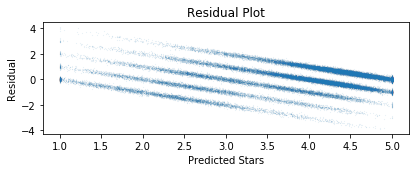

In [10]:
#Calculates residuals of model and outputs a scatter plot
pred_val = regOLS.fittedvalues.copy()
true_val = train['star'].values.copy()
noise = np.random.normal(0,.1,len(true_val))
true_val = true_val+noise
for i in range(0, len(pred_val)):
    if pred_val[i] > 5:
        pred_val[i] = 5
    if pred_val[i] < 1:
        pred_val[i] = 1
residual = true_val - pred_val
fig, ax = plt.subplots(figsize=(6,2.5))
plt.ylabel("Residual")
plt.xlabel("Predicted Stars")
plt.title("Residual Plot")
plt.tight_layout()
ax.scatter(pred_val,residual, s=.001)
plt.savefig("residualGraph.png")

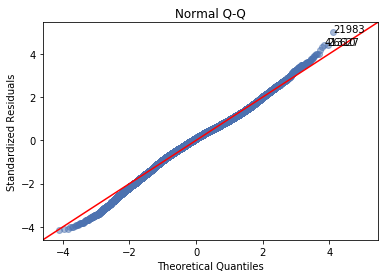

In [11]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot
# generate OLS model
model_fit = regOLS
# model values
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

In [12]:
#This cell outputs our predictions for the Kaggle Test data
testNames = test["name"]
testIDs = test["Id"]
testExpected = []
tooFar = 0
for i in range (0, len(testNames)):
    name = testNames[i]
    posC = 0
    negC = 0
    cityC = 0
    posOverall = 0
    if name in ratingAverage:
        rating = ratingAverage[name]
    else:
        rating = 3.758       
    for word in positiveWords:
        wordCount = test[word][i]
        posC+=wordCount
    for word in negativeWords:
        wordCount = test[word][i]
        negC+=wordCount
    if posC > negC:
        posOverall = 1
    elif posC < negC:
        posOverall = -1.5
    else:
        posOverall = 0
    nword = np.array(test["nword"])[i]
    posnshort = posC/nword
    predictors = np.array([[posOverall, rating, negC, posnshort]])
    prediction = reg.predict(predictors)
    predictedValue = prediction[0]
    #These two blocks take any predictions over 5 or less than 1 and bring them back into the range of possible ratings
    if predictedValue > 5:
        predictedValue = 5
        tooFar+=1
    elif predictedValue < 1:
        predictedValue=1
        tooFar+=1
    testExpected.append(predictedValue)
submitDF = pd.DataFrame({'Id':testIDs, 'Expected':testExpected})
submitDF.to_csv("submission01_e.csv", sep=',', index=False)

### 